In [3]:
from constants import target_name, x_path, y_path
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from libs.simple_hyper_tuner import gridsearchcv_tuner
from libs.simpleplotter import feature_importance, simple_roc
from sklearn import svm

cv = [2]
random_state = [50]
train_size = [0.8]

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)[target_name]

X.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,0.000000,0.222222,0.625000,0.067797,0.041667
1,1,0.006711,0.166667,0.416667,0.067797,0.041667
2,2,0.013423,0.111111,0.500000,0.050847,0.041667
3,3,0.020134,0.083333,0.458333,0.084746,0.041667
4,4,0.026846,0.194444,0.666667,0.067797,0.041667


> Model: SVC
- Accuracy score:  1.0
- Accuracy count:  30 / 30
- Precision score:  1.0
- Recall score:  1.0
- F1 score:  1.0
GridSearchCV Training Results:
- Best Score:  0.9916666666666667
Params:
- cv:  2
- Splitter Params:  {'train_size': 0.8, 'random_state': 50}
- Model Params:  SVC()
- Best H-Params:  {'decision_function_shape': 'ovr', 'kernel': 'rbf'}

Done.


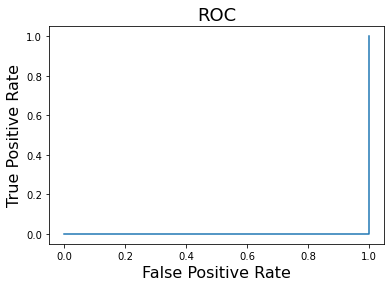

In [5]:

params = [
    {   # Binary or Multiclass - One-Vs-One and One-vs-Rest
        # https://www.baeldung.com/cs/svm-multiclass-classification
        'splitter': {'train_size': train_size, 'random_state': random_state},
        'cv': cv,
        'model': svm.SVC(),
        'hyperparams': {
            'decision_function_shape': ['ovr', 'ovo']
            , 'kernel': ['rbf', 'poly']
            # , 'shrinking': [True, False]
            # , 'coef0': [0, 0.2, 0.4]
            # , 'gamma' : ['scale', 'auto']
            # , 'degree': [1, 2, 3, 4, 5]
            # , 'C': [1, 0.1, 0.4, 0.7, 1.2]
        }
    }
]

model = gridsearchcv_tuner(X, y, params, 1)

In [6]:
feature_importance(model, X)

AttributeError: 'SVC' object has no attribute 'feature_importances_'